In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
from scipy.stats import stats
warnings.filterwarnings('ignore')

In [2]:
# load database connection
conn = sqlite3.connect('inventory.db')

df=pd.read_sql_query("select * from vendor_sales_summery", con=conn)
df.head(
    
)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actualprice,Volume,TotalPurchasesQuantity,TotalPurchasesDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,6798,109923.66,517,10851.83,461.78,949.94,257032.07,-99071.83,-912.950442,0.076052,0.098722
1,17035,PERNOD RICARD USA,2589,Jameson Irish Whiskey,30.76,39.99,1750.0,3169,97478.44,148,5622.52,835.78,271.95,123780.22,-91855.92,-1633.714420,0.046702,0.057680
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,4036,93594.84,341,9885.59,637.78,626.58,144929.24,-83709.25,-846.780516,0.084490,0.105621
3,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,3307,86874.89,170,5948.30,769.78,312.35,68601.68,-80926.59,-1360.499470,0.051406,0.068470
4,8004,SAZERAC CO INC,5138,Fireball Cinnamon Whisky,11.10,13.99,750.0,5998,66577.80,344,4812.56,601.57,270.86,50293.62,-61765.24,-1283.417557,0.057352,0.072285


In [3]:
# summery statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,4701.0,9.125857e+03,15643.022701,60.00,3252.00,7153.000000,9552.000000,173357.000000
Brand,4701.0,1.647393e+04,13252.166401,58.00,4414.00,13899.000000,25623.000000,90631.000000
PurchasePrice,4701.0,1.420384e+01,37.707353,0.38,6.53,9.390000,15.190000,2222.210000
Actualprice,4701.0,2.071030e+01,48.359478,0.49,9.99,13.990000,21.990000,2799.990000
Volume,4701.0,8.999668e+02,714.823770,50.00,750.00,750.000000,750.000000,18000.000000
TotalPurchasesQuantity,4701.0,2.298685e+02,525.552635,1.00,24.00,63.000000,191.000000,12030.000000
TotalPurchasesDollars,4701.0,2.261578e+03,5718.686045,0.72,216.72,690.200000,1984.200000,109923.660000
TotalSalesQuantity,4701.0,1.436375e+01,40.937139,0.00,0.00,1.000000,12.000000,837.000000
TotalSalesDollars,4701.0,1.816698e+02,540.608236,0.00,0.00,11.990000,172.780000,10851.830000
TotalSalesPrice,4701.0,7.964973e+01,145.407845,0.00,0.00,10.990000,105.960000,1919.900000


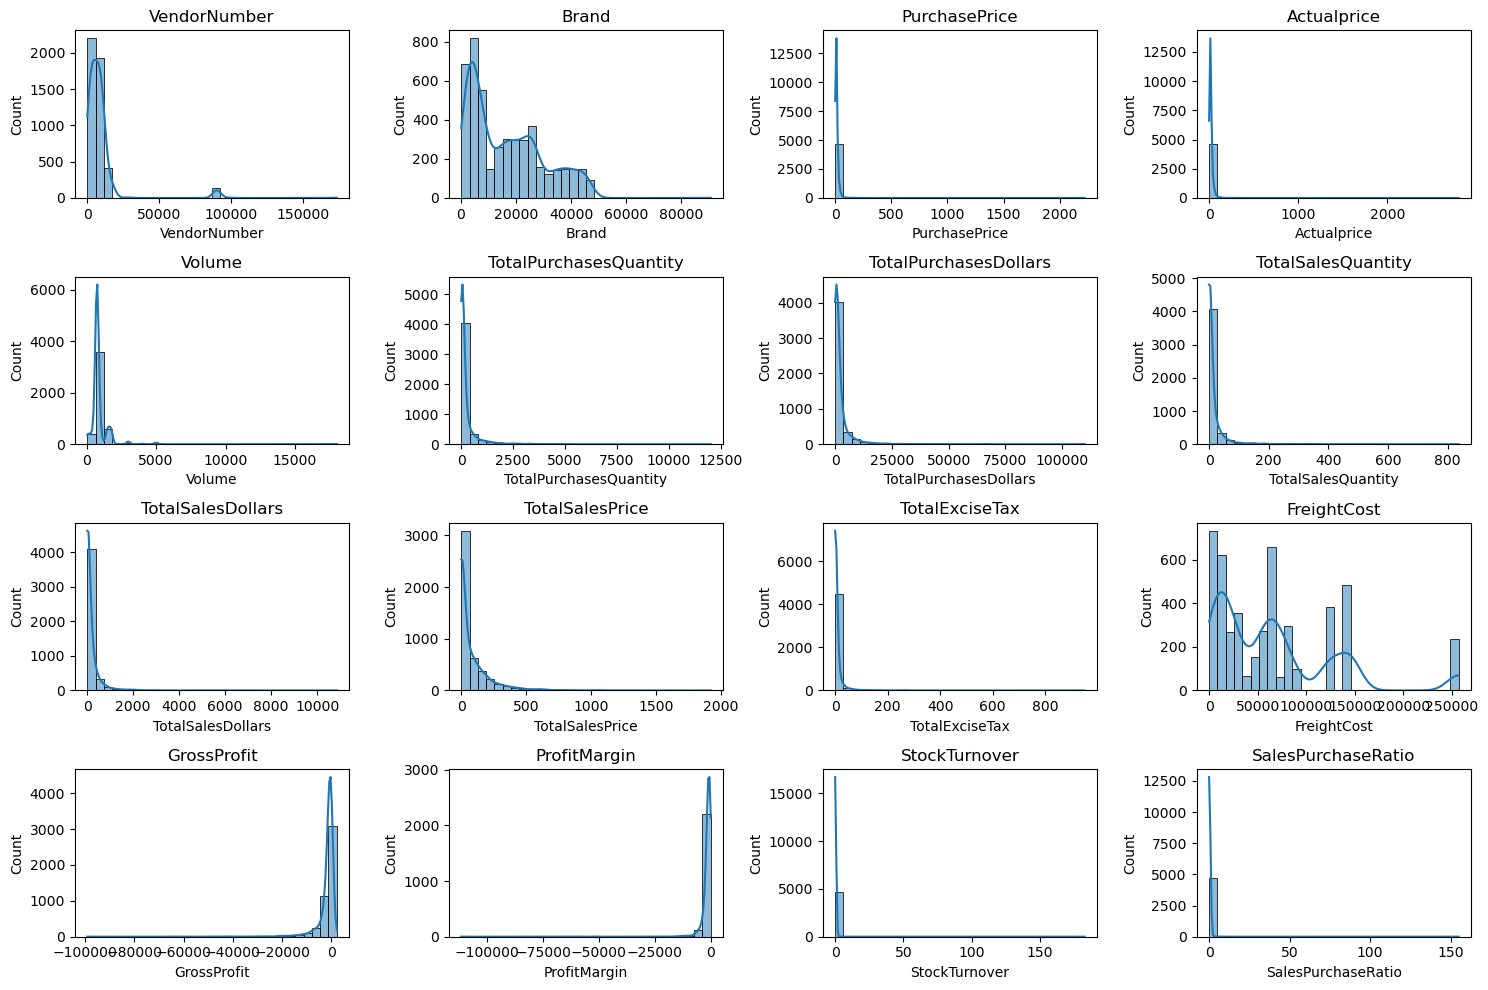

In [4]:
# Distribution Plot for Numeric Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize = (15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

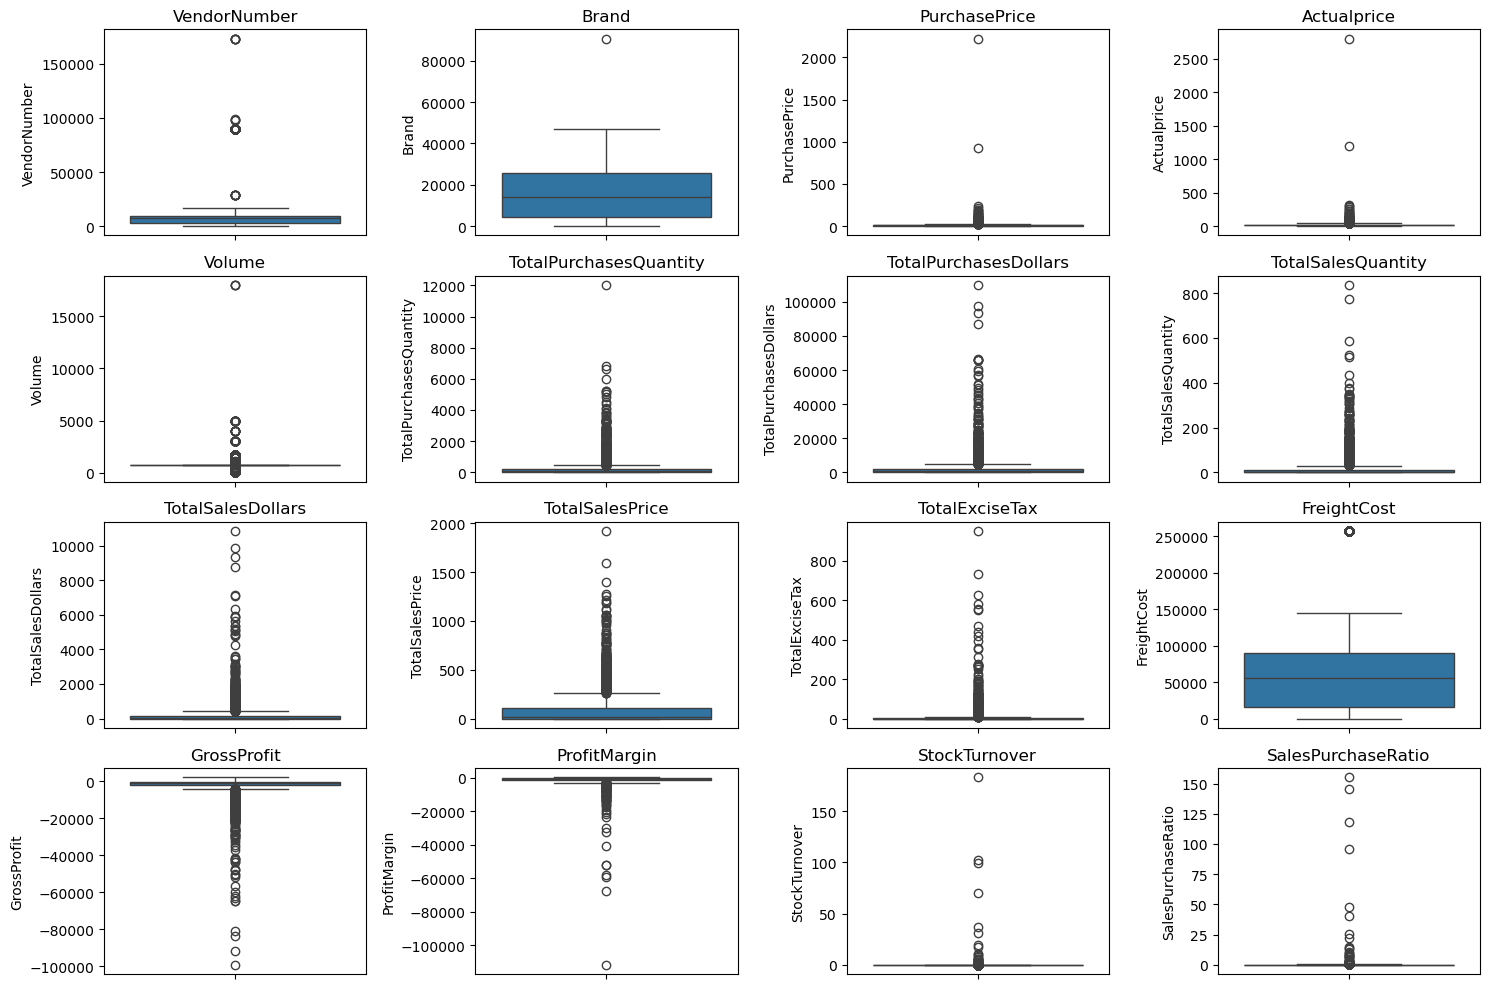

In [5]:
plt.figure(figsize = (15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [7]:
df = pd.read_sql_query("""SELECT *
                       from vendor_sales_summery
                       where GrossProfit > 0
                       AND ProfitMargin > 0
                       AND TotalSalesQuantity >0""", con=conn)

In [8]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actualprice,Volume,TotalPurchasesQuantity,TotalPurchasesDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,8004,SAZERAC CO INC,539,Bowman's Vodka,4.20,5.79,1000.0,205,861.00,526,3045.54,75.27,552.30,50293.62,2184.54,71.729151,2.565854,3.537213
1,9819,TREASURY WINE ESTATES,19636,Ch St Jean Chard Sonoma Cst,7.99,11.99,750.0,58,463.42,55,659.45,275.77,6.15,14836.57,196.03,29.726287,0.948276,1.423007
2,8112,MOET HENNESSY USA INC,42188,Moet & Chandon Nectar Imp Rs,34.01,52.99,750.0,12,408.12,11,549.89,199.96,1.24,48347.26,141.77,25.781520,0.916667,1.347373
3,1392,CONSTELLATION BRANDS INC,6214,Taylor Red Port,9.08,13.99,3000.0,42,381.36,32,447.68,153.89,14.40,79528.99,66.32,14.814153,0.761905,1.173904
4,7245,PROXIMO SPIRITS INC.,585,1800 Reposado Gold Tequila,22.55,29.99,1000.0,12,270.60,12,359.88,59.98,12.60,38994.78,89.28,24.808269,1.000000,1.329933
5,12546,JIM BEAM BRANDS COMPANY,806,DeKuyper Peachtree Schnapps,10.39,12.99,1000.0,24,249.36,36,467.64,38.97,37.80,123880.97,218.28,46.676931,1.500000,1.875361
6,9165,ULTRA BEVERAGE COMPANY LLP,25774,Ch Tourril Panatella Red,5.22,7.99,750.0,47,245.34,77,615.23,143.82,8.66,68054.70,369.89,60.122231,1.638298,2.507663
7,9552,M S WALKER INC,1189,Mad River 3 Pack Revolution,39.36,49.99,600.0,6,236.16,5,249.95,149.97,3.15,55551.82,13.79,5.517103,0.833333,1.058393
8,12546,JIM BEAM BRANDS COMPANY,1993,Maker's Mark 46,17.16,22.99,375.0,12,205.92,15,284.85,189.90,5.90,123880.97,78.93,27.709321,1.250000,1.383304
9,1128,BROWN-FORMAN CORP,2250,Jack Daniels Family 4 Pk/50m,9.69,12.99,50.0,18,174.42,19,284.81,164.89,0.97,68601.68,110.39,38.759173,1.055556,1.632898


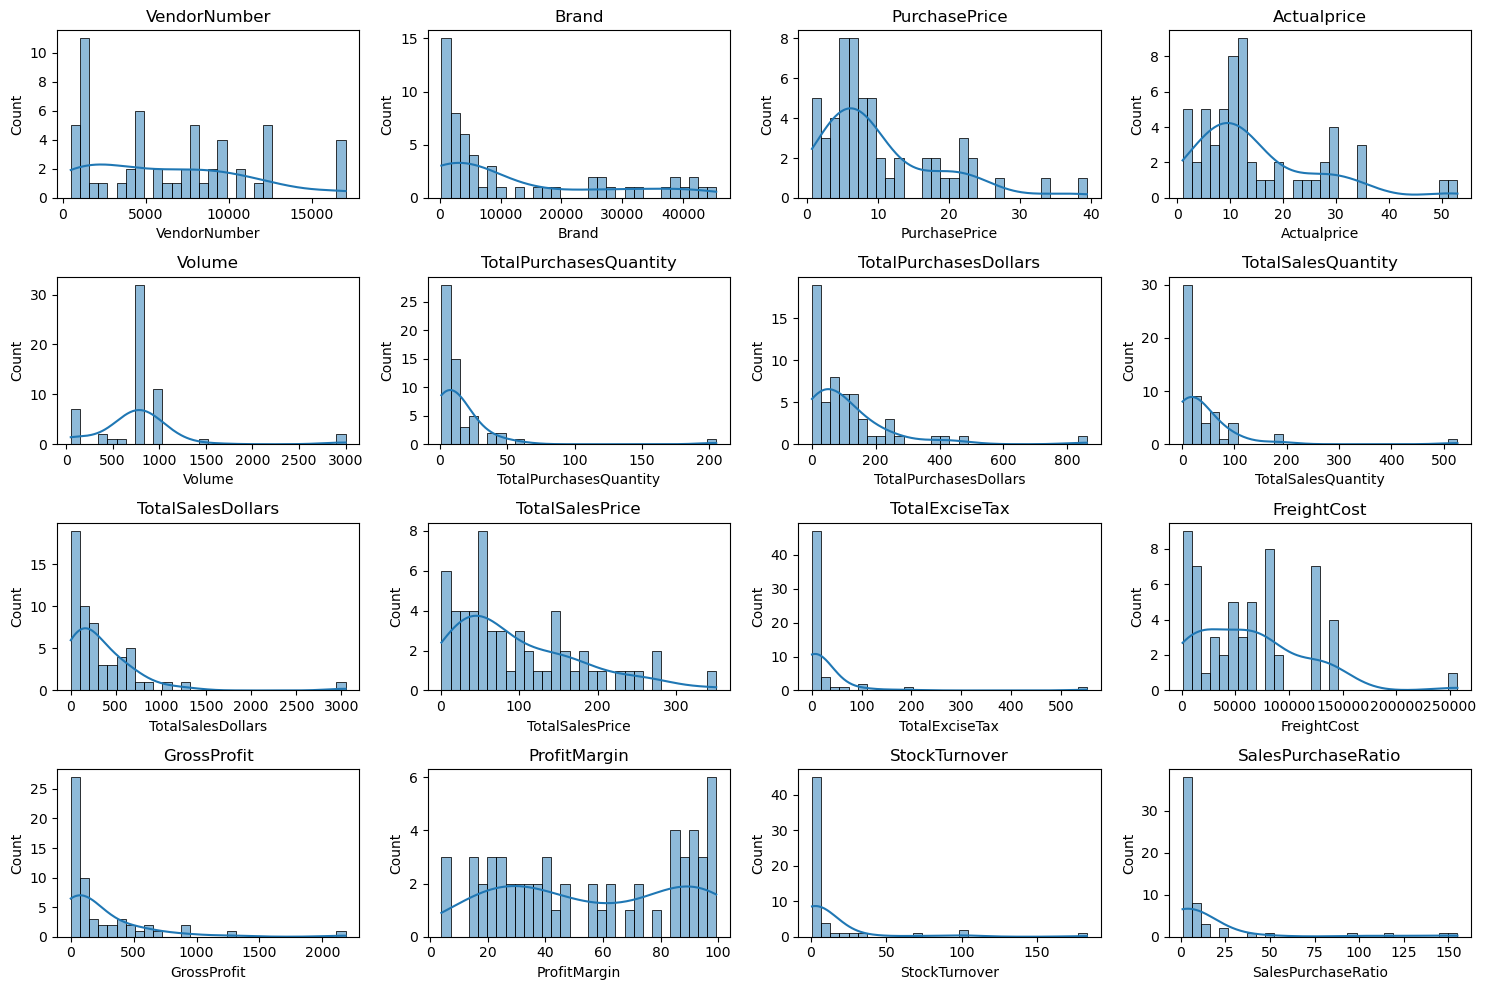

In [9]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize = (15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

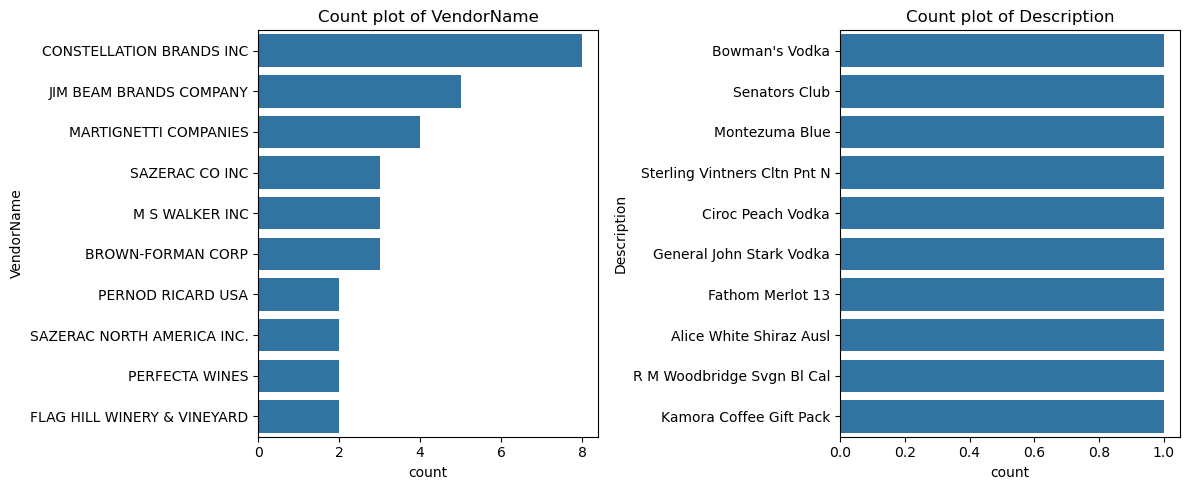

In [11]:
# Count Plots for Category Columnas
categorical_cols = ["VendorName","Description"]

plt.figure(figsize = (12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y = df[col],order=df[col].value_counts().index[:10])
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

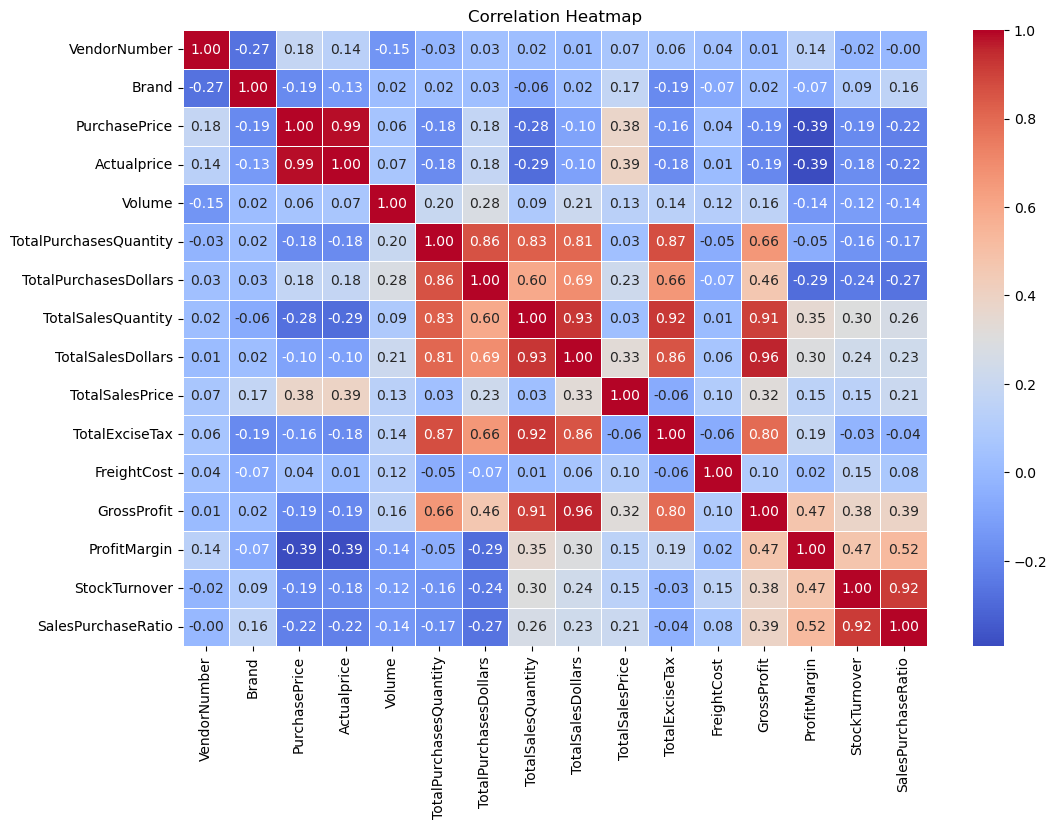

In [12]:
# correlation Heatmap
plt.figure(figsize = (12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.5)
plt.title("Correlation Heatmap")
plt.show()

Identify Brand that needs Promotional or Pricing Adjustments...

In [15]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars' : 'sum',
    'ProfitMargin' : 'mean'}).reset_index()

In [16]:
low_sales_threshold =brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold =brand_performance['TotalSalesDollars'].quantile(0.15)

In [17]:
low_sales_threshold

52.78

In [18]:
high_margin_threshold

52.78

In [19]:
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)]

print("Brand with low sales and high margin:")
display(target_brands.sort_values('TotalSalesDollars'))

Brand with low sales and high margin:


,Description,TotalSalesDollars,ProfitMargin
3,Bacardi Raspberry Rum,30.69,92.766373
46,Rebel Yell Root Beer Bourbon,36.63,97.897898
51,Skyy Infusions Cranberry,38.61,96.114996
27,Hiram Walker Creme de Cassis,41.45,54.909530
29,Jack Daniels Honey & Fire Pk,51.98,64.293959


In [22]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000000]

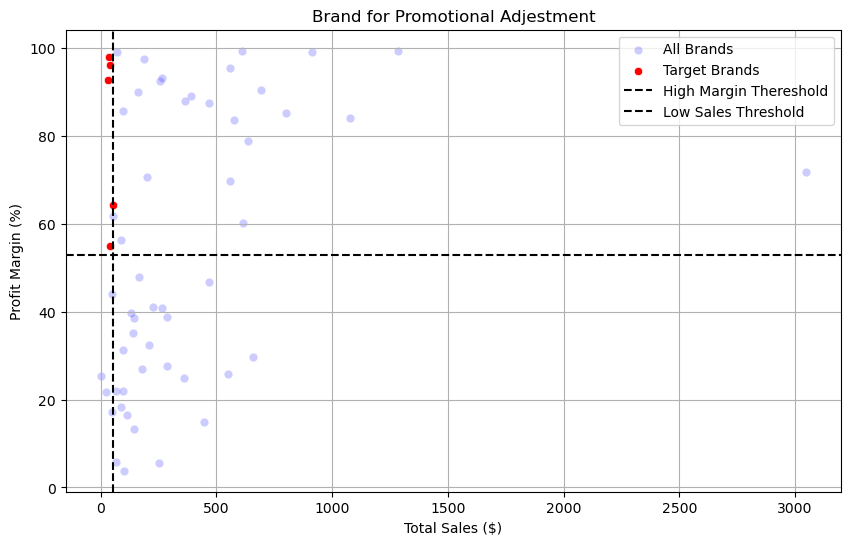

In [23]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = brand_performance, x = 'TotalSalesDollars', y = 'ProfitMargin', color = 'blue', label = 'All Brands', alpha = 0.2)
sns.scatterplot(data = target_brands, x = 'TotalSalesDollars', y = 'ProfitMargin', color = 'red', label = 'Target Brands')

plt.axhline(high_margin_threshold, linestyle = '--',color = 'black', label = 'High Margin Thereshold')
plt.axvline(low_sales_threshold, linestyle = '--', color = 'black', label = 'Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title("Brand for Promotional Adjestment")
plt.legend()
plt.grid(True)
plt.show()

Which vendors and brand demonstrate the highest sales performance?

In [28]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [26]:
top_vendors = df.groupby('VendorName')["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby('Description')["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
SAZERAC CO INC                3279.34
MARTIGNETTI COMPANIES         3110.60
CONSTELLATION BRANDS INC      2161.78
M S WALKER INC                1903.19
JIM BEAM BRANDS COMPANY       1252.47
ULTRA BEVERAGE COMPANY LLP    1004.93
BROWN-FORMAN CORP              896.44
MOET HENNESSY USA INC          805.80
LAIRD & CO                     692.01
TREASURY WINE ESTATES          659.45
Name: TotalSalesDollars, dtype: float64

In [27]:
top_brands

Description
Bowman's Vodka                  3045.54
DeLoach Ethans Vyd Znfdl        1286.01
Baroca White Rum                1078.20
Clayhouse Adobe Cntrl Cst Wh     913.17
Hallowed Ground Proprtry Red     799.50
Senators Club                    692.01
Ch St Jean Chard Sonoma Cst      659.45
Cribari Chianti                  637.42
Ch Tourril Panatella Red         615.23
Montgras RSV Svgn Bl Casabln     610.98
Name: TotalSalesDollars, dtype: float64

In [29]:
top_brands.apply(lambda x: format_dollars(x))

Description
Bowman's Vodka                              3.05K
DeLoach Ethans Vyd Znfdl                    1.29K
Baroca White Rum                            1.08K
Clayhouse Adobe Cntrl Cst Wh    913.1700000000001
Hallowed Ground Proprtry Red    799.5000000000002
Senators Club                              692.01
Ch St Jean Chard Sonoma Cst                659.45
Cribari Chianti                 637.4200000000001
Ch Tourril Panatella Red        615.2299999999999
Montgras RSV Svgn Bl Casabln               610.98
Name: TotalSalesDollars, dtype: object

In [30]:
top_vendors.apply(lambda x: format_dollars(x))

VendorName
SAZERAC CO INC                            3.28K
MARTIGNETTI COMPANIES                     3.11K
CONSTELLATION BRANDS INC                  2.16K
M S WALKER INC                            1.90K
JIM BEAM BRANDS COMPANY                   1.25K
ULTRA BEVERAGE COMPANY LLP                1.00K
BROWN-FORMAN CORP             896.4400000000002
MOET HENNESSY USA INC                     805.8
LAIRD & CO                               692.01
TREASURY WINE ESTATES                    659.45
Name: TotalSalesDollars, dtype: object